In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [44]:
from data_cleaning import clean_comment, lemmatize_sentence
example_sentence = 'Its wings are too small to get its fat little body off the ground.'
example_text = 'According to all known laws of aviation, there is no way a bee should be able to fly. \
                Its wings are too small to get its fat little body off the ground. The bee, of course, \
                flies anyway because bees don\'t care what humans think is impossible. \
                Yellow, black. Yellow, black. Yellow, black. Yellow, black. Ooh, black and yellow!'

print(f'Lemmatized sentence: {lemmatize_sentence(example_sentence)}\n')
print(f'Cleaned comment (with sentences separated): {clean_comment(example_text)}')

Lemmatized sentence: it wing are too small to get it fat little body off the ground

Cleaned comment (with sentences separated): according to all known law of aviation there is no way a bee should be able to fly\it wing are too small to get it fat little body off the ground\the bee of course fly anyway because bee don t care what human think is impossible\yellow black\yellow black\yellow black\yellow black\ooh black and yellow


In [11]:
from sentiment_analysis import analyze_subreddit
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ali1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [49]:
def plot_sentiment_line(subreddit, sentiment_dicts):
    for comment_dict in sentiment_dicts:
        plt.plot(comment_dict.keys(), [value[0] for value in comment_dict.values()])
    plt.xlabel('Comment depth')
    plt.ylabel('Average compound sentiment score')
    plt.title(f'r/{subreddit} Most Replied Comments\' Sentiment Analysis')
    plt.show()

def plot_sentiment_bubble(subreddit, sentiment_dicts):
    for comment_dict in sentiment_dicts:
         sns.scatterplot(x=comment_dict.keys(), y=[value[0] for value in comment_dict.values()], 
                         size=[value[1] for value in comment_dict.values()], alpha = 0.75, legend=False, sizes=(20, 2000))
    plt.xlabel('Comment depth')
    plt.ylabel('Average compound sentiment score')
    plt.title(f'r/{subreddit} Most Replied Comments\' Sentiment Analysis')
    plt.show()
            
def get_sentiment_difference(sentiment_dicts):
    difference_dicts = []
    for comment_dict in sentiment_dicts:
        difference_dict = {key: (0,0) for key in comment_dict.keys()}
        for key in difference_dict.keys():
            difference_dict[key] = (comment_dict[key][0] - comment_dict[0][0], comment_dict[key][1])   
        difference_dicts.append(difference_dict)
    return difference_dicts
            
def plot_sentiment_difference_line(subreddit, sentiment_dicts):
    difference_dicts = get_sentiment_difference(sentiment_dicts)
    for difference_dict in difference_dicts:
        plt.plot(difference_dict.keys(), [value[0] for value in difference_dict.values()], '--')
    plt.xlabel('Comment depth')
    plt.ylabel('Average compound sentiment score')
    plt.title(f'r/{subreddit} Most Replied Comments\' Sentiment Change Over Depth')
    plt.show()

def plot_sentiment_difference_bubble(subreddit, sentiment_dicts):
    difference_dicts = get_sentiment_difference(sentiment_dicts)
    for difference_dict in difference_dicts:
         sns.scatterplot(x=difference_dict.keys(), y=[value[0] for value in difference_dict.values()], 
                         size=[value[1] for value in difference_dict.values()], alpha = 0.75, legend=False, sizes=(20, 2000))
    plt.xlabel('Comment depth')
    plt.ylabel('Average compound sentiment score')
    plt.title(f'r/{subreddit} Most Replied Comments\' Sentiment Change Over Depth')
    plt.show()

def get_sentiment_categorized(sentiment_dicts):
    categorized_dicts = []
    for comment_dict in sentiment_dicts:
        shift = 0
        if comment_dict[0][0] < 0:
            shift = -1 - comment_dict[0][0]
        elif comment_dict[0][0] > 0:
            shift = 1 - comment_dict[0][0]
        categorized_dict = {key: (0,0) for key in comment_dict.keys()}
        for key in categorized_dict.keys():
            categorized_dict[key] = (comment_dict[key][0] + shift, comment_dict[key][1])   
        categorized_dicts.append(categorized_dict)
    return categorized_dicts    

def plot_sentiment_categorized_line(subreddit, sentiment_dicts):
    categorized_dicts = get_sentiment_categorized(sentiment_dicts)
    for categorized_dict in categorized_dicts:
        plt.plot(categorized_dict.keys(), [value[0] for value in categorized_dict.values()], '--')
    plt.xlabel('Comment depth')
    plt.ylabel('Average compound sentiment score')
    plt.title(f'r/{subreddit} Most Replied Comments\' Sentiment Change Based on Initial Sentiment')
    plt.show()

def plot_sentiment_categorized_bubble(subreddit, sentiment_dicts):
    categorized_dicts = get_sentiment_categorized(sentiment_dicts)
    for categorized_dict in categorized_dicts:
         sns.scatterplot(x=categorized_dict.keys(), y=[value[0] for value in categorized_dict.values()], 
                         size=[value[1] for value in categorized_dict.values()], alpha = 0.75, legend=False, sizes=(20, 2000))
    plt.xlabel('Comment depth')
    plt.ylabel('Average compound sentiment score')
    plt.title(f'r/{subreddit} Most Replied Comments\' Sentiment Change Based on Initial Sentiment')
    plt.show()

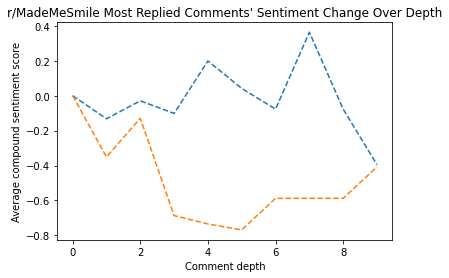

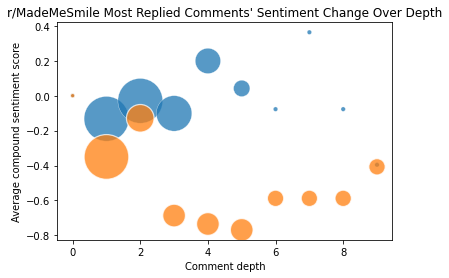

In [53]:
subreddit = 'MadeMeSmile'
sentiment_dicts = analyze_subreddit(subreddit)
plot_sentiment_difference_line(subreddit, sentiment_dicts)
plot_sentiment_difference_bubble(subreddit, sentiment_dicts)

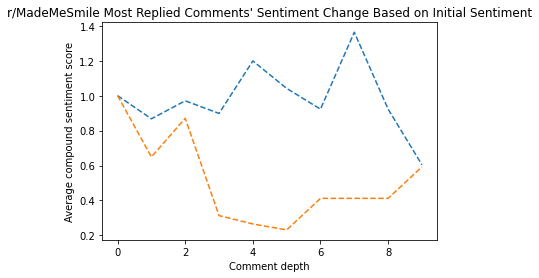

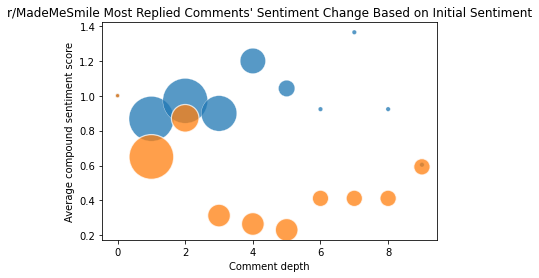

In [54]:
plot_sentiment_categorized_line(subreddit, sentiment_dicts)
plot_sentiment_categorized_bubble(subreddit, sentiment_dicts)